# Лабораторная работа 4
## Решение уравнений гиперболического типа

Выполнил: Гапанович А. В. (4 группа) \
Вариант 1

Для решения дана следующая задача:
$$\frac{\partial U}{\partial t}+ u\frac{\partial U}{\partial x} = 0 $$


С условием распространения треугольного импульса:
$$ U(x,0) = \begin{cases}
 & \ 200x, x\epsilon \left[0,0.5 \right] \\ 
 & \ 200(1-x), x\epsilon \left[0.5, 1 \right]
\end{cases}$$
Цель:
* получить аналитическое решение
* явная двухслойная схема (FTCS метод)
* явная схема Лакса-Вендрофа,
* схема Рихтмайера (двухшаговый метод типа Лакса-Вендрофа)
* схема МакКормака (предиктор-корректорная схема типа Лакса-Вендрофа)
* противопотоковый метод первого порядка
* противопотоковый метод второго порядка


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [44]:
u = 0.2
l = 10
N_s = 500 #кол-во узлов по пространствен. коорд.

time_sum = 10
time_1 = 0.1
time_2 = 0.5
time_3 = 1
time_4 = 5
time_5 = 10

с_1 = 0.1
с_2 = 0.5
с_3 = 1
с_4 = 1.5

def fun_initial(x):
    if (x < 1/2):
        res = 200 * x
    elif (x < 1):
        res = 200 * (1-x)
    else:
        res = 0
    return res   
def border_left(t):
    return 0
def border_right(t):
    return 0

# 1. Аналитическое решение.
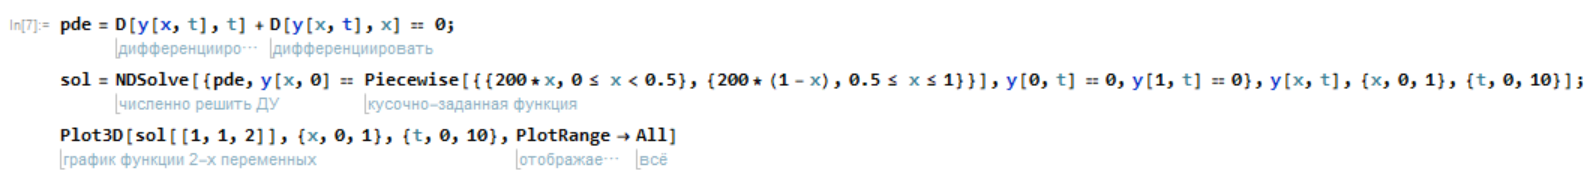


# 2. Явная двухслойная схема

$$\frac{U_{i,j+1}-U_{i,j}}{\tau}+ u \frac{U_{i+1,j}-U_{i-1,j}}{2h}=0$$

In [45]:
def explicit_schem( N_s, c):
    h = l / N_s
    tau = h * c / u
    N_t = int(time_sum / tau)
    print("Конвекционное число = ", c)
    matrix = np.zeros((N_t + 1, N_s + 1))
    
    for i in range(N_s + 1):
        matrix[0][i] = fun_initial(i * h)
        
    for j in range(N_t + 1):
        matrix[j][0] = border_left(j * tau)
        matrix[j][N_s] = border_right(j * tau)
        
    for i in range(N_t):
        for j in range(N_s):
            matrix[i + 1][j] = matrix[i][j] - c /2 * (matrix[i][j + 1] - matrix[i][j - 1])
    return matrix

In [46]:
def draw_explicit_schem(с, time_1, time_2, time_3, time_4, time_5):
    matrix_1 = explicit_schem(N_s, с)
    N_t, size_x = np.shape(matrix_1)
    x = np.linspace(0, l, size_x)
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Явная двухслойная схема, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_1[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Явная двухслойная схема, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Явная двухслойная схема, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Явная двухслойная схема, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Явная двухслойная схема, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Явная двухслойная схема, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_5-1, :])

Конвекционное число =  0.1


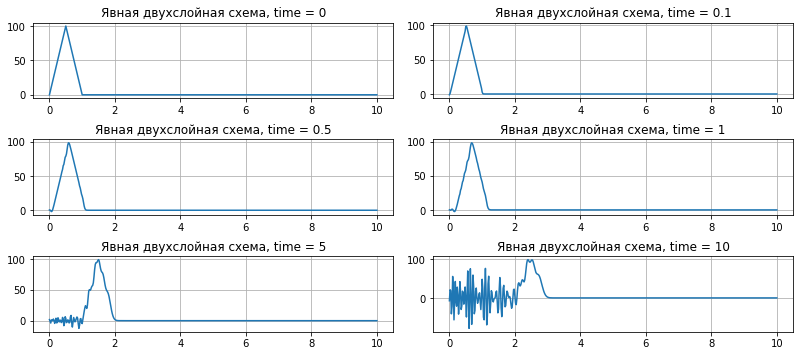

In [47]:
draw_explicit_schem(с_1, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  0.5


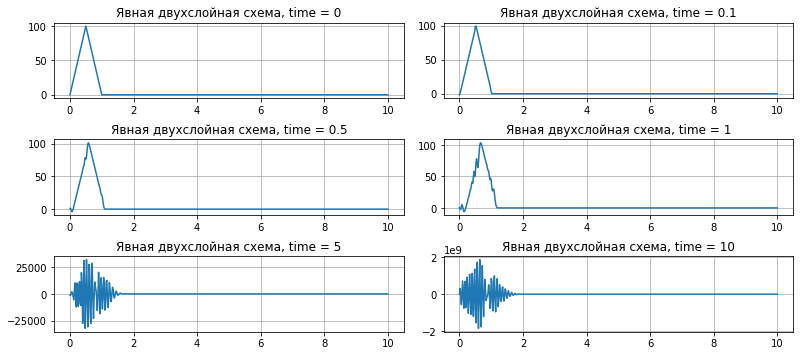

In [48]:
draw_explicit_schem(с_2, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1


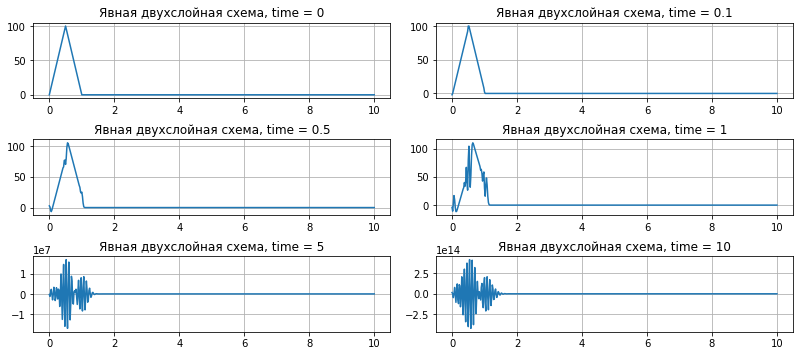

In [49]:
draw_explicit_schem(с_3, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1.5


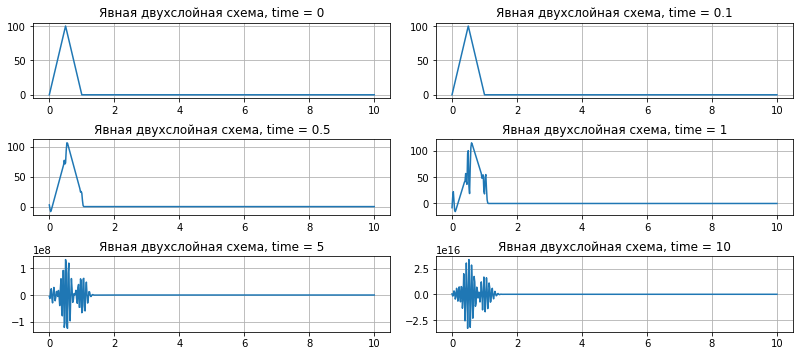

In [50]:
draw_explicit_schem(с_4, time_1, time_2, time_3, time_4, time_5)

# 3. Схема Лакса-Вендрофа

$$ U_{i,j+1}=U_{i,j}-u\left(\frac{U_{i+1,j}-U_{i-1,j}}{2h} \right)\tau +\frac{1}{2}u^{2}\left(\frac{U_{i+1,j}-2U_{i,j}+U_{i-1,j}}{h^{2}} \right) $$

In [51]:
def Lax_Wendroff_schem(N_s, c):
    h = l / N_s
    tau = h * c / u
    N_t = int(time_sum / tau)
    print("Конвекционное число = ", c)
    matrix = np.zeros((N_t + 1, N_s + 1))
    
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i * h)
        
    for j in range(N_t + 1):
        matrix[j][0] = border_left(j * tau)
        matrix[j][N_s] = border_right(j * tau)
        
    for i in range(N_t):
        for j in range(1, N_s):
            matrix[i+1][j] = (matrix[i][j] - c / 2 * (matrix[i][j+1]-matrix[i][j-1]) + c * c / 2 *(matrix[i][j+1]-2*matrix[i][j]+matrix[i][j-1]))
    return matrix

In [52]:
def draw_Lax_Wendroff_schem(с, time_1, time_2, time_3, time_4, time_5):
    matrix_2 = Lax_Wendroff_schem(N_s, с)
    N_t, size_x = np.shape(matrix_2)
    x = np.linspace(0, l, size_x)
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Схема Лакса-Вендрофа, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_2[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Схема Лакса-Вендрофа, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Схема Лакса-Вендрофа, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Схема Лакса-Вендрофа, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Схема Лакса-Вендрофа, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Схема Лакса-Вендрофа, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_5-1, :])

Конвекционное число =  0.1


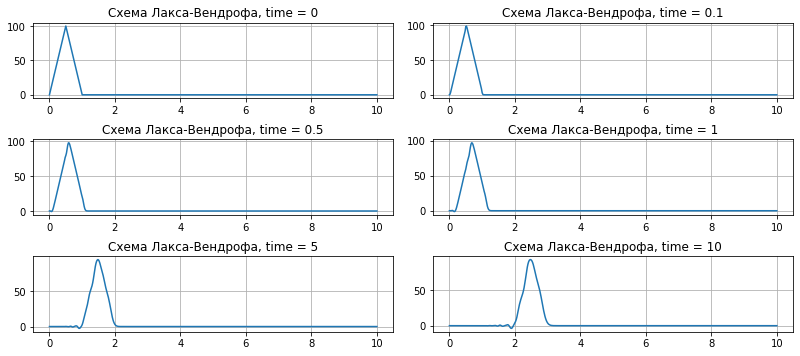

In [53]:
draw_Lax_Wendroff_schem(с_1, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  0.5


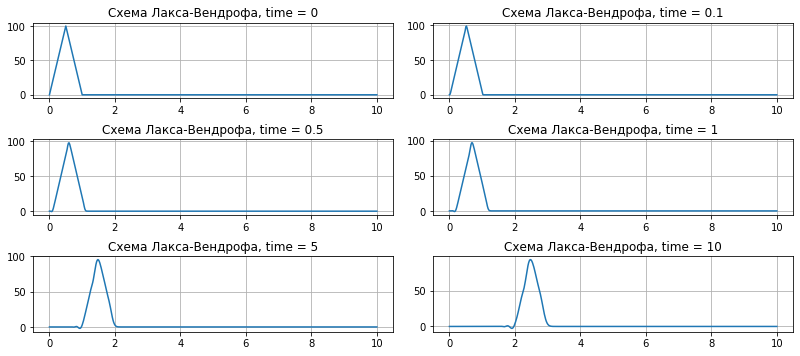

In [54]:
draw_Lax_Wendroff_schem(с_2, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1


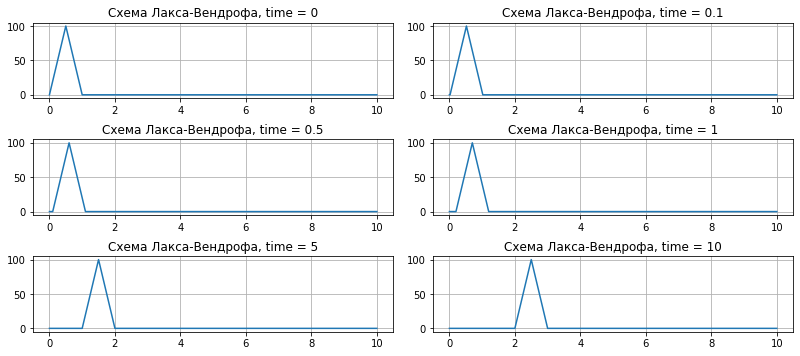

In [55]:
draw_Lax_Wendroff_schem(с_3, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1.5


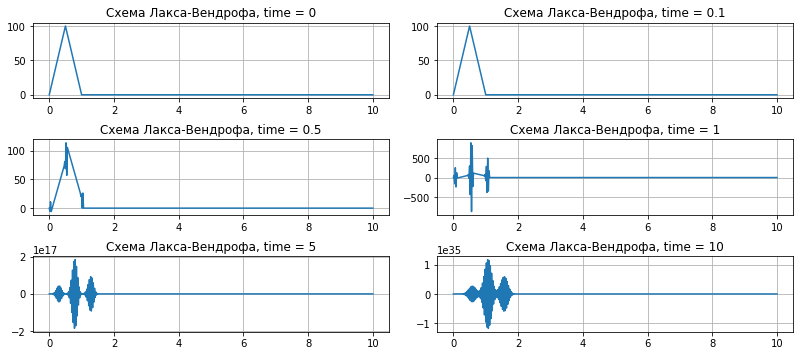

In [56]:
draw_Lax_Wendroff_schem(с_4, time_1, time_2, time_3, time_4, time_5)

# 4. Cхема Рихтмайера (двухшаговый метод типа Лакса-Вендрофа)

$$U_{i,j+1} = \frac{1}{2}\left( U_{i+1,j}+U_{i-1,j}\right)-\frac{c}{2}\left(U_{i+1,j}-U_{i-1,j} \right)$$
$$U_{i,j+2} = U_{i,j}-c\left(U_{i+1,j+1}-U_{i-1,j+1} \right)$$

In [57]:
def Richtmeier_schem(N_s, c):
    h = l / N_s
    tau = h * c / u
    N_t = int(time_sum / tau)
    print("Конвекционное число = ", c)
    matrix = np.zeros((N_t + 1, N_s + 1))
    
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i * h)
    
    for j in range(N_t + 1):
        matrix[j][0] = border_left(j * tau)
        matrix[j][N_s] = border_right(j * tau)
    
    for i in range(N_t):
        #prev = tmp1
        tmp_1 = (matrix[i][1] + matrix[i][0]) / 2 - c / 2* (matrix[i][1] - matrix[i][0])
        for j in range(1, N_s):
            tmp_2 = (matrix[i][j + 1] + matrix[i][j]) / 2 - c /2 * (matrix[i][j + 1] - matrix[i][j])
            matrix[i + 1][j] = matrix[i][j] - c * (tmp_2 - tmp_1)
            tmp_1 = tmp_2
    return matrix

In [58]:
def draw_Richtmeier_schem(с, time_1, time_2, time_3, time_4, time_5):
    matrix_3 = Richtmeier_schem(N_s, с)
    N_t, size_x = np.shape(matrix_3)
    x = np.linspace(0, l, size_x)
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Cхема Рихтмайера, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_3[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Cхема Рихтмайера, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Cхема Рихтмайера, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Cхема Рихтмайера, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Cхема Рихтмайера, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Cхема Рихтмайера, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_5-1, :])

Конвекционное число =  0.1


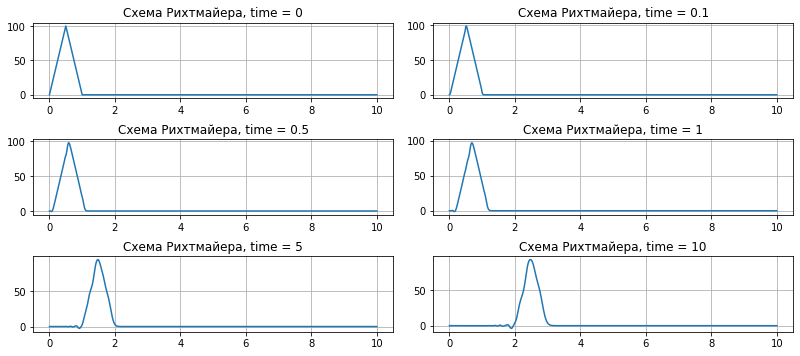

In [59]:
draw_Richtmeier_schem(с_1, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  0.5


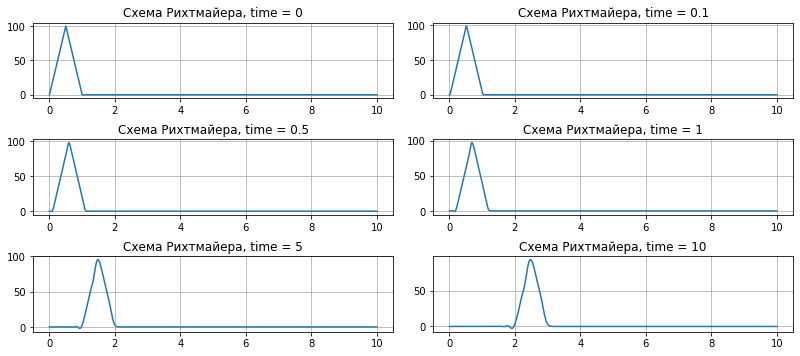

In [60]:
draw_Richtmeier_schem(с_2, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1


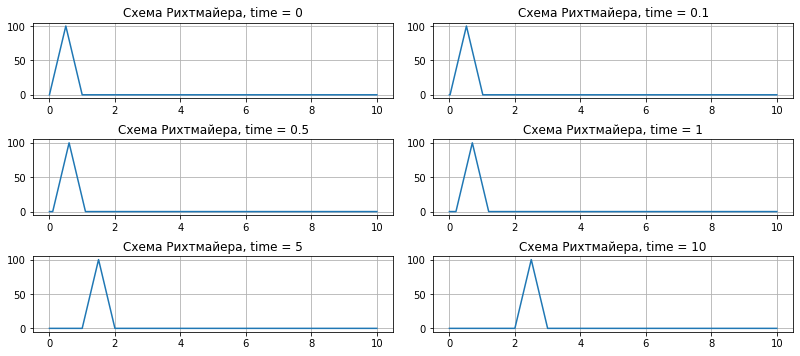

In [61]:
draw_Richtmeier_schem(с_3, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1.5


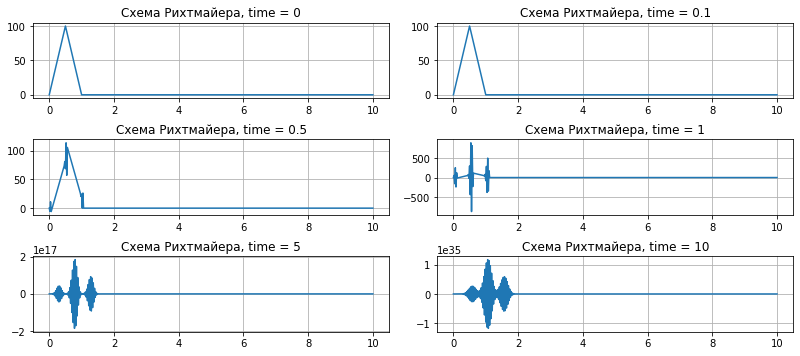

In [62]:
draw_Richtmeier_schem(с_4, time_1, time_2, time_3, time_4, time_5)

# 5. Cхема МакКормака (предиктор-корректорная схема типа Лакса-Вендрофа)

$$\bar{U}_{i,j+1}=U_{i,j}-c\left(U_{i+1,j} - U_{i,j} \right)$$
$$U_{i, j+1} =\frac{1}{2}\left[U_{i,j}+\bar{U}_{i, j+1}-c\left(\bar{U}_{i, j+1} - \bar{U}_{i-1, j+1}\right) \right]$$

In [63]:
def McCormacks_schem(N_s, c):
    h = l / N_s
    tau = h * c / u
    N_t = int(time_sum / tau)
    print("Конвекционное число = ", c)
    matrix = np.zeros((N_t + 1, N_s + 1))
    
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i * h)
        
    for j in range(N_t + 1):
        matrix[j][0] = border_left(j * tau)
        matrix[j][N_s] = border_right(j * tau)
        
    matrix_ = np.zeros((N_t + 1, N_s + 1))
        
    for i in range(N_t):
        for j in range(1, N_s):
            matrix_[i + 1][j] = matrix[i][j] - c * (matrix[i][j + 1] - matrix[i][j])
            matrix[i + 1][j] = ((matrix[i][j] + matrix_[i + 1][j] - 
                                 c * (matrix_[i + 1][j] - matrix_[i + 1][j- 1])) / 2)
    return matrix

In [64]:
def draw_McCormacks_schem(с, time_1, time_2, time_3, time_4, time_5):
    matrix_4 = McCormacks_schem(N_s, с)
    N_t, size_x = np.shape(matrix_4)
    x = np.linspace(0, l, size_x)
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Cхема МакКормака, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_4[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Cхема МакКормака, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Cхема МакКормака, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Cхема МакКормака, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Cхема МакКормака, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Cхема МакКормака, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_5-1, :])

Конвекционное число =  0.1


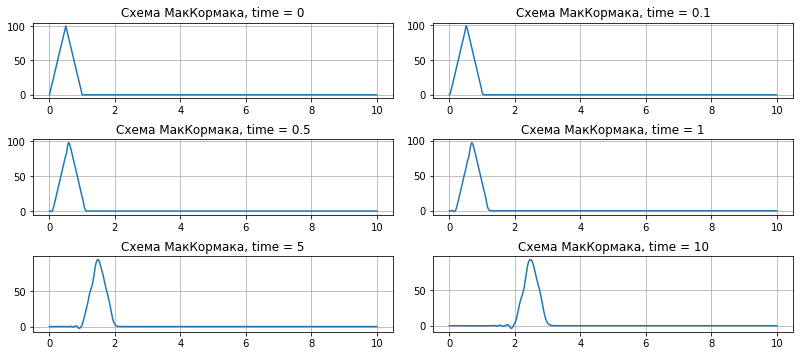

In [65]:
draw_McCormacks_schem(с_1, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  0.5


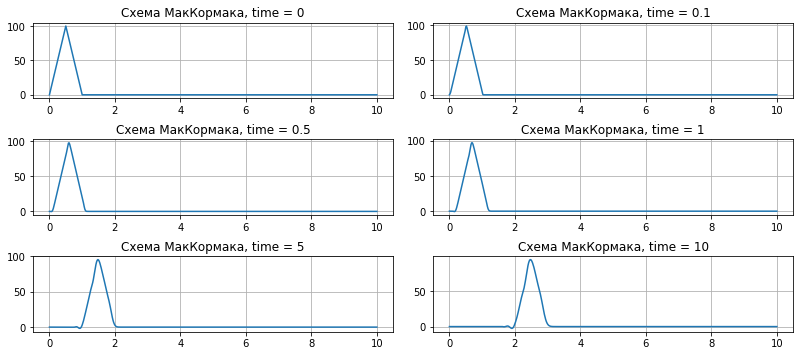

In [66]:
draw_McCormacks_schem(с_2, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1


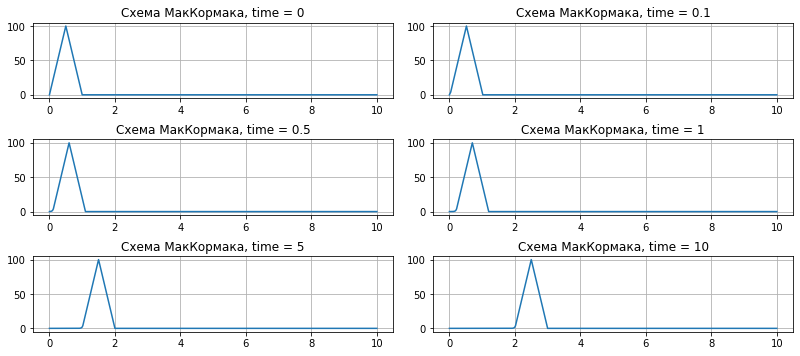

In [67]:
draw_McCormacks_schem(с_3, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1.5


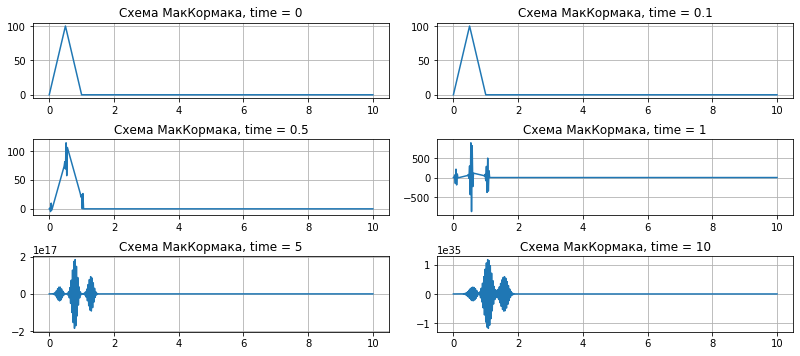

In [68]:
draw_McCormacks_schem(с_4, time_1, time_2, time_3, time_4, time_5)

# 6. Противопотоковый метод первого порядка

$$\frac{U_{i,j+1}-U_{i,j}}{\tau}+u\frac{U_{i,j}-U_{i-1,j}}{h}=0$$

In [69]:
def Counterflow_method_1(N_s, c):
    h = l / N_s
    tau = h * c / u
    N_t = int(time_sum / tau)
    print("Конвекционное число = ", c)
    matrix = np.zeros((N_t + 1, N_s + 1))
    
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i * h)
        
    for j in range(N_t + 1):
        matrix[j][0] = border_left(j * tau)
        matrix[j][N_s] = border_right(j * tau)
    
    for k in range(N_t):
        for j in range(1, N_s):
            matrix[k + 1][j] = matrix[k][j] - c * (matrix[k][j] - matrix[k][j - 1])
    return matrix

In [70]:
def draw_Counterflow_method_1(с, time_1, time_2, time_3, time_4, time_5):
    matrix_5 = Counterflow_method_1(N_s, с)
    N_t, size_x = np.shape(matrix_5)
    x = np.linspace(0, l, size_x)
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Противопотоковый метод первого порядка, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_5[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Противопотоковый метод первого порядка, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Противопотоковый метод первого порядка, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Противопотоковый метод первого порядка, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Противопотоковый метод первого порядка, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Противопотоковый метод первого порядка, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_5-1, :])

Конвекционное число =  0.1


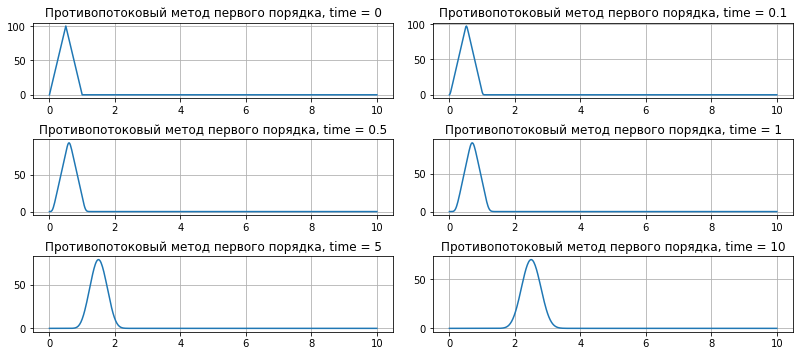

In [71]:
draw_Counterflow_method_1(с_1, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  0.5


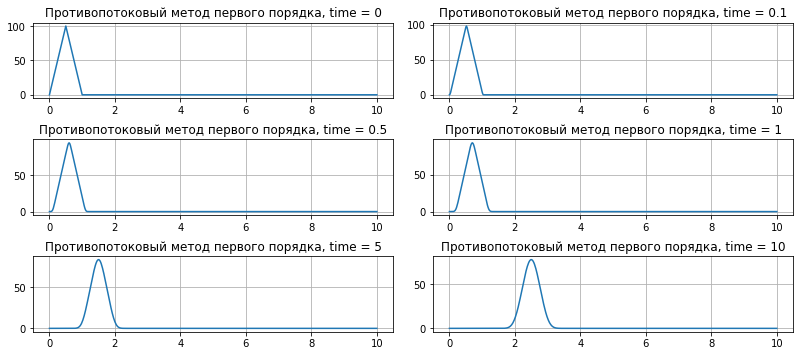

In [72]:
draw_Counterflow_method_1(с_2, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1


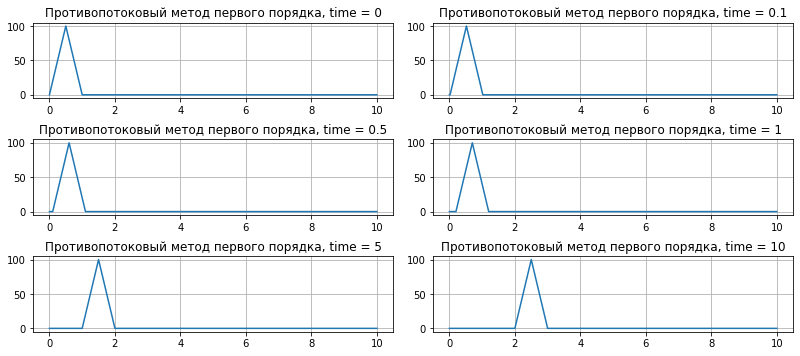

In [73]:
draw_Counterflow_method_1(с_3, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1.5


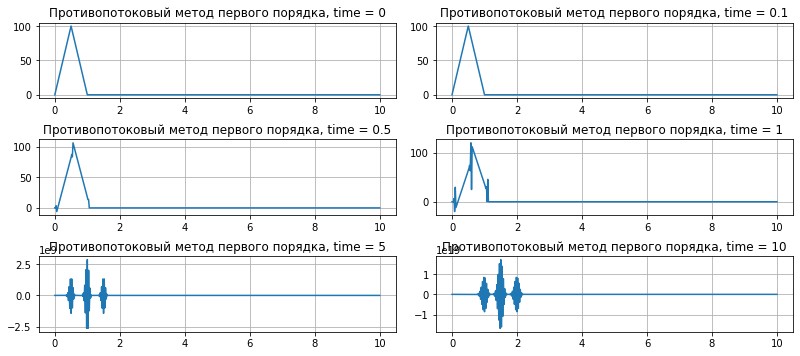

In [74]:
draw_Counterflow_method_1(с_4, time_1, time_2, time_3, time_4, time_5)

# 7. Противопотоковый метод первого порядка

$$U_{i,j+1} = U_{i,j}-c\left(U_{i,j}-U_{i-1,j} \right)-\frac{c(1-c)}{2}\left(U_{i,j} -2U_{i-1,j} +U_{i-2,j} \right)$$

In [75]:
def Counterflow_method_2(N_s, c):
    h = l / N_s
    tau = h * c / u
    N_t = int(time_sum / tau)
    print("Конвекционное число = ", c)
    matrix = np.zeros((N_t + 1, N_s + 1))
    
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i * h)
    
    for j in range(N_t + 1):
        matrix[j][0] = border_left(j * tau)
        matrix[j][N_s] = border_right(j * tau)
        
    for i in range(1, N_t + 1):
        matrix[i][1] = matrix[i - 1][1] - c * (matrix[i - 1][1] - matrix[i - 1][0])
        
    
    for i in range(N_t):
        for j in range(2, N_s):
            matrix[i+1][j] = (matrix[i][j] - c*(matrix[i][j] - matrix[i][j-1]) - 
                              c*(1-c)*(matrix[i][j] - 2 * matrix[i][j-1] 
                                       + matrix[i][j-2]) / 2)
 
    return matrix

In [76]:
def draw_Counterflow_method_2(с, time_1, time_2, time_3, time_4, time_5):
    matrix_6 = Counterflow_method_2(N_s, с)
    N_t, size_x = np.shape(matrix_6)
    x = np.linspace(0, l, size_x)
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Противопотоковый метод второго порядка, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_6[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Противопотоковый метод второго порядка, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_6[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Противопотоковый метод второго порядка, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_6[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Противопотоковый метод второго порядка, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_6[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Противопотоковый метод второго порядка, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_6[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Противопотоковый метод второго порядка, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_6[moment_5-1, :])

Конвекционное число =  0.1


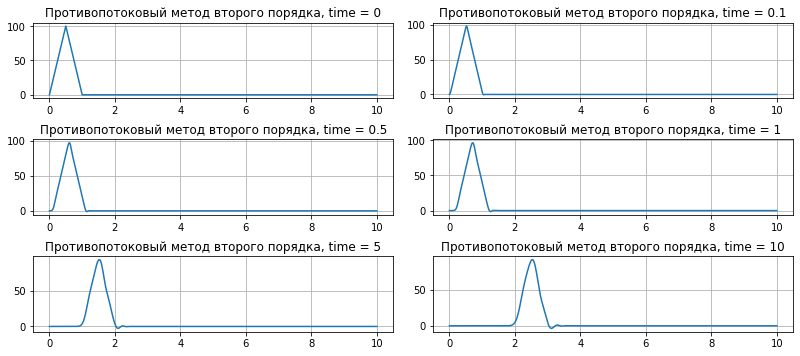

In [77]:
draw_Counterflow_method_2(с_1, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  0.5


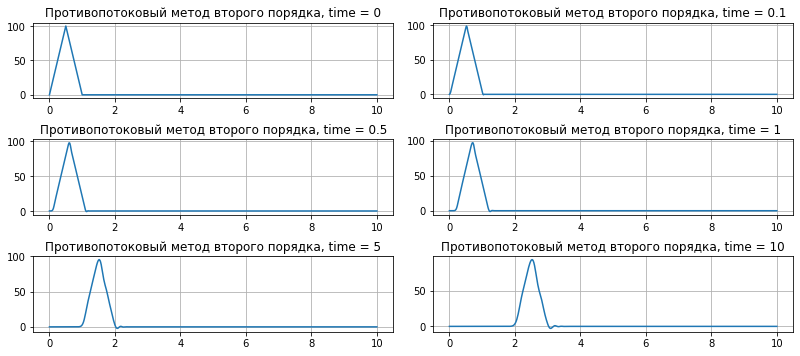

In [78]:
draw_Counterflow_method_2(с_2, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1


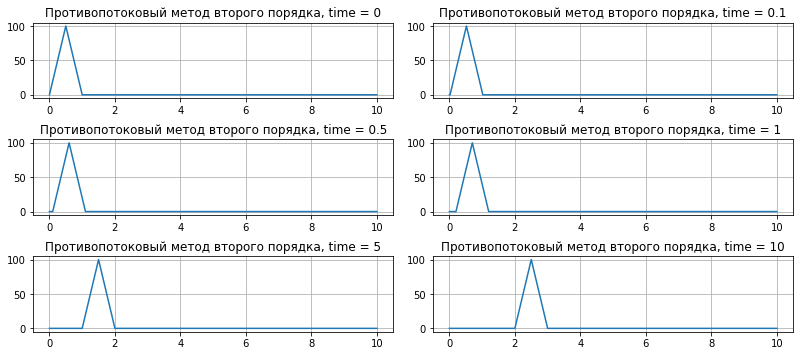

In [79]:
draw_Counterflow_method_2(с_3, time_1, time_2, time_3, time_4, time_5)

Конвекционное число =  1.5


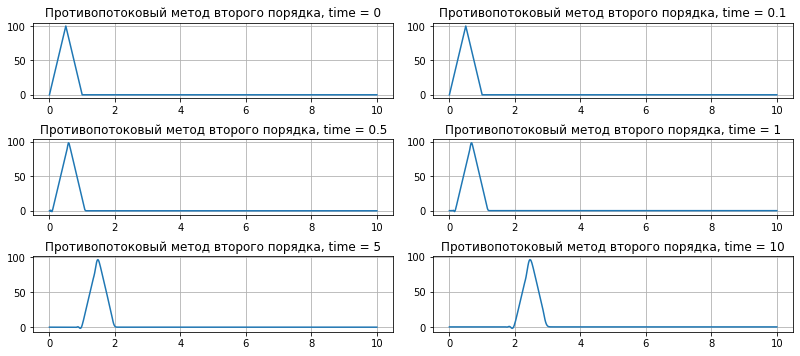

In [80]:
draw_Counterflow_method_2(с_4, time_1, time_2, time_3, time_4, time_5)